In [29]:
import torch

In [30]:
words = open('names.txt', 'r').read().splitlines()

In [31]:
chars = sorted(list(set(''.join(words))))
print(chars)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [32]:
# create a two way dictionray for encoding
stoi= {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}
print(stoi)
print(itos)

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}
{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [33]:
# calculate the frequency of which character comes after which 
for w in words:
    chs = ['.']+ list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1= stoi[ch1]
        ix2= stoi[ch2]
        N[ix1, ix2] += 1

(-0.5, 26.5, 26.5, -0.5)

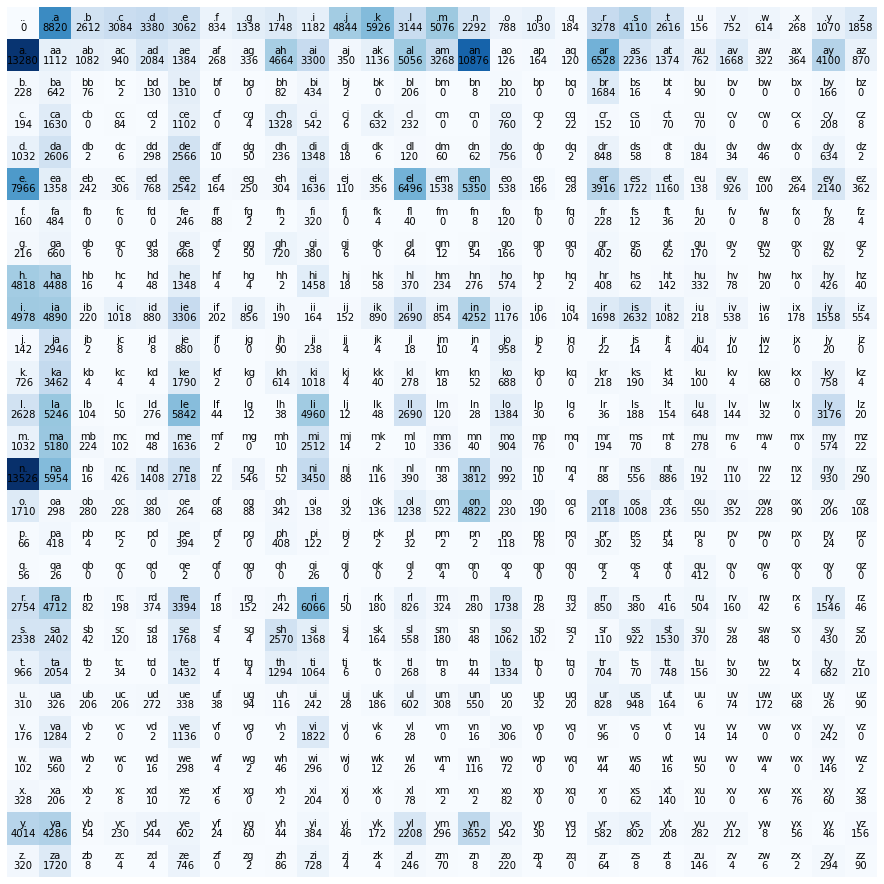

In [34]:
# visulizing the frequency
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color='black')
        plt.text(j, i, N[i, j].item(), ha='center', va='top', color='black')

plt.axis('off')    

In [35]:
# getting read of any infinte loss by adding 1
P = (N+1).float()
# making a probability of each character in a single row
P /= P.sum(1, keepdim=True)

In [36]:
# applying the bigram approach of predicting the next character
# sampling :)
g = torch.Generator().manual_seed(2147483647)
for i in range(5):
    out = []
    ix = 0
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.


In [37]:
# calculating the loss using the negative log likelihood
log_likelihood = 0.0
n = 0
for w in words:
    chs = ['.']+ list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1= stoi[ch1]
        ix2= stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob        
        n += 1
        
print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-559938.8125)
nll=tensor(559938.8125)
2.4543004035949707
